## Projeto de Análise de Dados e Automação

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
from cycler import cycler
from datetime import datetime, timedelta

yf.pdr_override()

### Analisando o Índice IBOVESPA

- O índice IBOVESPA é o mais importante indicador do desempenho médio das cotações negociadas na bolsa de valores B3.<br>
- Ele é formado pelos ativos (ações) com maior volume negociado nos últimos meses.

### Período

In [2]:
dias = int(input('Digite o período em número de dias '))

Digite o período em número de dias 720


In [3]:
data_inicial = datetime.now() - timedelta(days=dias)
data_final = datetime.now()

### Pegando os Dados dos Ativos

In [4]:
# requisiçao
df_ibov = pdr.get_data_yahoo('^BVSP', data_inicial, data_final)['Adj Close']
df_ibov

[*********************100%%**********************]  1 of 1 completed


Date
2021-11-08    104781.0
2021-11-09    105535.0
2021-11-10    105968.0
2021-11-11    107725.0
2021-11-12    106312.0
                ...   
2023-10-23    112785.0
2023-10-24    113762.0
2023-10-25    112830.0
2023-10-26    114777.0
2023-10-27    113301.0
Name: Adj Close, Length: 494, dtype: float64

### Calculando o Retorno

In [5]:
# localizando o último e o primeiro preço
retorno = df_ibov.iloc[-1] / df_ibov.iloc[0] - 1
print('O retorno foi de: {:.2%}'.format(retorno))

O retorno foi de: 8.13%


### Média Móvel

- **Média Móvel** é um dos indicadores que são observados pelos analistas e investidores que atuam no mercado financeiro, serve para verificar tendências dentro de uma análise gráfica.

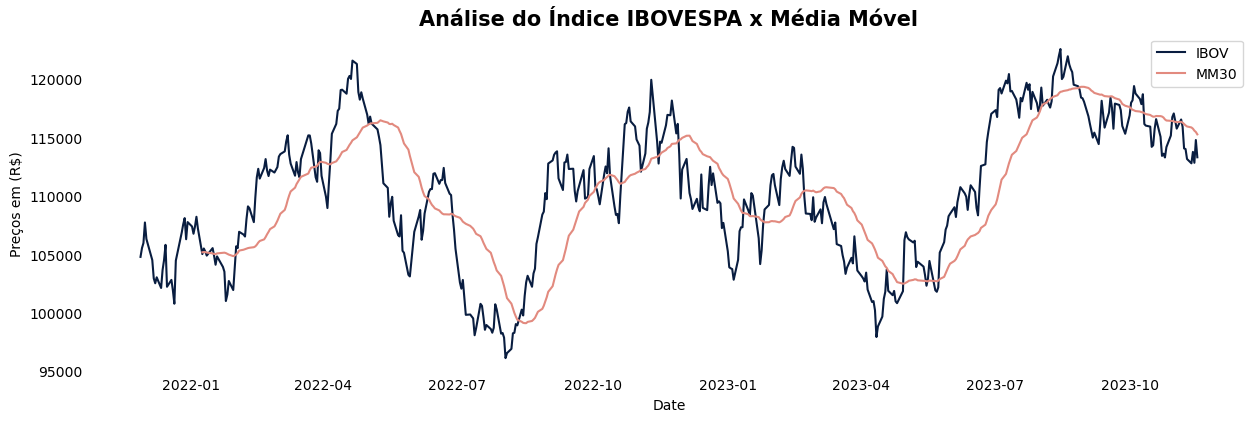

In [6]:
# Gráfico
df_ibov.plot(label='IBOV', figsize=(15, 5), color='#091D40')

# Verificando a janela do tempo
media_movel = df_ibov.rolling(30).mean()

# Gráfico
media_movel.plot(label='MM30', color='#E28A7F')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.box(False)
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Análise do Índice IBOVESPA x Média Móvel', fontsize=15, fontweight='bold')
plt.ylabel('Preços em (R$)')
plt.show()

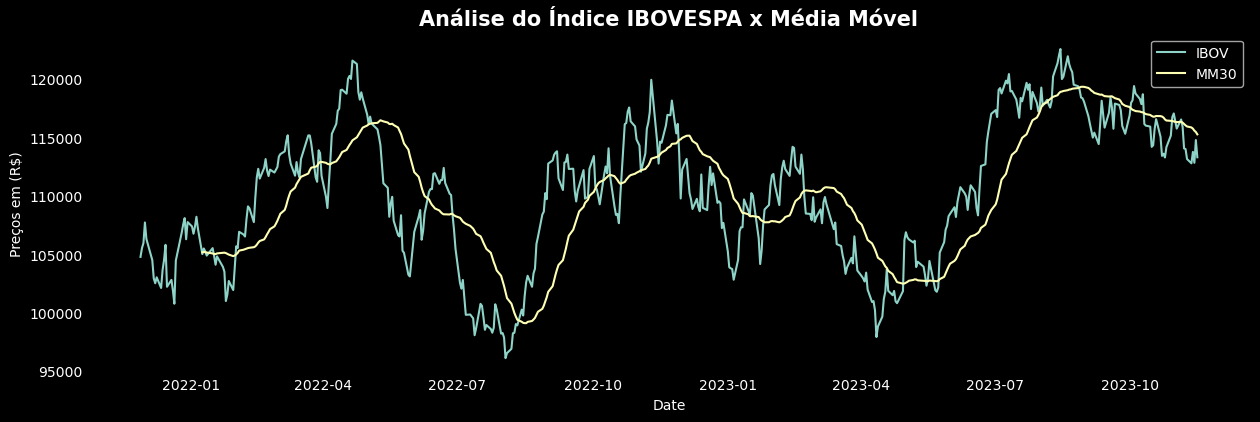

In [8]:
# Estilo
plt.style.use('dark_background')

# Gráfico
df_ibov.plot(label='IBOV', figsize=(15, 5))

# Verificando a janela do tempo
media_movel = df_ibov.rolling(30).mean()

# Gráfico
media_movel.plot(label='MM30')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.box(False)
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Análise do Índice IBOVESPA x Média Móvel', fontsize=15, fontweight='bold')
plt.ylabel('Preços em (R$)')
plt.show()

In [12]:
df_carteira = pd.read_excel('carteira.xlsx')
df_carteira

,Ticker,Empresa,Setor,Cotas
0,AGRO3,Brasilagro,Agropecuária,100
1,B3SA3,B3,Serviços Financeiros,100
2,EGIE3,Engie Brasill,Energia Elétrica,50
3,LEVE3,Metal Leve,Automóveis e Motocicletas,75
4,PRIO3,Petrorio,Petróleo e Gás,100
5,PSSA3,Porto Seguro,Previdência e Seguros,50
6,ODPV3,Odontoprev,Seviços Médicos,100
7,SUZB3,Suzano S.A,Madeira e Papel,100
8,WEGE3,WEG,Máquinas e Equipamentos,50


In [13]:
data_inical = datetime.now() - timedelta(days=120)
data_final = datetime.now()

# transformando a coluna Ticker em uma lista python
lista_ativos = list(df_carteira['Ticker'].astype(str) + '.SA')

# requisição
df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inical, data_final)['Adj Close']
df_cotacoes = round(df_cotacoes, 2)
df_cotacoes

[*********************100%%**********************]  9 of 9 completed


,AGRO3.SA,B3SA3.SA,EGIE3.SA,LEVE3.SA,ODPV3.SA,PRIO3.SA,PSSA3.SA,SUZB3.SA,WEGE3.SA
Date,,,,,,,,,
2023-07-03,22.20,14.68,44.28,45.63,12.25,37.42,28.33,44.22,37.48
2023-07-04,22.56,14.49,44.14,44.45,12.17,38.04,28.50,44.73,36.99
2023-07-05,22.88,14.48,43.99,44.70,12.08,38.62,28.52,44.45,37.30
2023-07-06,22.87,13.94,43.64,44.75,12.05,38.15,28.44,44.11,36.69
2023-07-07,23.11,14.12,43.70,46.14,12.76,39.35,28.62,44.51,36.80
...,...,...,...,...,...,...,...,...,...
2023-10-23,26.53,11.31,40.81,38.00,11.04,48.84,25.30,54.40,33.90
2023-10-24,26.97,11.60,40.55,40.80,11.21,48.85,25.52,52.51,35.01
2023-10-25,24.54,11.54,40.23,40.46,10.59,48.36,25.97,52.60,31.47


### Tratamento de Dados

In [14]:
# trazendo informações do dataframe
df_cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2023-07-03 to 2023-10-27
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGRO3.SA  83 non-null     float64
 1   B3SA3.SA  83 non-null     float64
 2   EGIE3.SA  83 non-null     float64
 3   LEVE3.SA  83 non-null     float64
 4   ODPV3.SA  83 non-null     float64
 5   PRIO3.SA  83 non-null     float64
 6   PSSA3.SA  83 non-null     float64
 7   SUZB3.SA  83 non-null     float64
 8   WEGE3.SA  83 non-null     float64
dtypes: float64(9)
memory usage: 6.5 KB


- Os dados dentro do dataframe que aparecerem em branco serão tratados e preenchidos com os dados do dia anterior, porque para o caso especifico de preços de ações não seria coerente aplicar estatísticas como (moda ou média) dos valores analisados no perídodo.

In [15]:
# preencehdo valores vázios
df_cotacoes = df_cotacoes.ffill()

In [16]:
df_cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2023-07-03 to 2023-10-27
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGRO3.SA  83 non-null     float64
 1   B3SA3.SA  83 non-null     float64
 2   EGIE3.SA  83 non-null     float64
 3   LEVE3.SA  83 non-null     float64
 4   ODPV3.SA  83 non-null     float64
 5   PRIO3.SA  83 non-null     float64
 6   PSSA3.SA  83 non-null     float64
 7   SUZB3.SA  83 non-null     float64
 8   WEGE3.SA  83 non-null     float64
dtypes: float64(9)
memory usage: 6.5 KB


### Normalizando os Dados

- Colocando os dados para incializarem a partir do mesmo valor (1) e estarão todos na mesma base, e se verificará que determinados ativos ou terão subido ou terão caido.<br>
- Pegando o último valor de uma coluna e dividindo pelo primeiro valor da mesma coluna, os outros valores do range da coluna será a comparação entre eles e o valor inicial.

In [18]:
df_cotacoesNorm = df_cotacoes / df_cotacoes.iloc[0]

### Plotando Gráfico

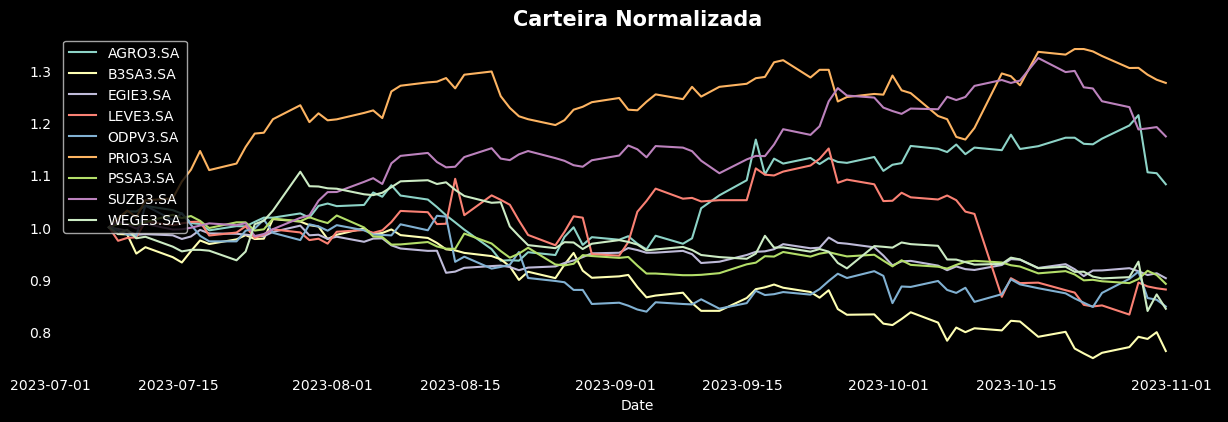

In [23]:
# Estilo
plt.style.use('dark_background')

df_cotacoesNorm.plot(figsize=(15, 5))
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Carteira Normalizada', fontsize=15, fontweight='bold')
plt.box(False)
plt.show()

### Calculando o Retorno da Carteira

**observação:** Para calcular o retorno da carteira não pode ser todo consolidado, porque precisamo calcular o retorno de cada ativo devido as cotações dos preços serem distintas.<br>
- Pega o valor de cotação de cada ativo e multiplica pela quantidade de cotas de cada um dos ativos.

### Criando um Novo Dataframe de Valores Investidos

In [25]:
# criando um dataframe vázio
df_valorInvestido = pd.DataFrame()

# percorrendo cada ativo do dataframe
for ativo in df_carteira['Ticker']:
    cotas = df_carteira.loc[df_carteira['Ticker'] == ativo, 'Cotas'].values[0]
    # criando uma nova coluna com os valores de cada ativo
    df_valorInvestido[ativo] = cotas * df_cotacoes[f'{ativo}.SA']
    
# criando uma nova coluna com o valor total
df_valorInvestido['Total'] = df_valorInvestido.sum(axis=1)   # somando todos os valores das colunas

df_valorInvestido = round(df_valorInvestido, 2)
df_valorInvestido

,AGRO3,B3SA3,EGIE3,LEVE3,PRIO3,PSSA3,ODPV3,SUZB3,WEGE3,Total
Date,,,,,,,,,,
2023-07-03,2220.0,1468.0,2214.0,3422.25,3742.0,1416.5,1225.0,4422.0,1874.0,22003.75
2023-07-04,2256.0,1449.0,2207.0,3333.75,3804.0,1425.0,1217.0,4473.0,1849.5,22014.25
2023-07-05,2288.0,1448.0,2199.5,3352.50,3862.0,1426.0,1208.0,4445.0,1865.0,22094.00
2023-07-06,2287.0,1394.0,2182.0,3356.25,3815.0,1422.0,1205.0,4411.0,1834.5,21906.75
2023-07-07,2311.0,1412.0,2185.0,3460.50,3935.0,1431.0,1276.0,4451.0,1840.0,22301.50
...,...,...,...,...,...,...,...,...,...,...
2023-10-23,2653.0,1131.0,2040.5,2850.00,4884.0,1265.0,1104.0,5440.0,1695.0,23062.50
2023-10-24,2697.0,1160.0,2027.5,3060.00,4885.0,1276.0,1121.0,5251.0,1750.5,23228.00
2023-10-25,2454.0,1154.0,2011.5,3034.50,4836.0,1298.5,1059.0,5260.0,1573.5,22681.00


### Comparando o Retorno da Carteira com o Índice do IBOVESPA

#### Normalizando os dados da Carteira e os dados do IBOVESPA

- Colocando os dados para incializarem a partir do mesmo valor (1) e estarão todos na mesma base, e se verificará que determinados ativos ou terão subido ou terão caido.<br>
- Pegando o último valor de uma coluna e dividindo pelo primeiro valor da mesma coluna, os outros valores do range da coluna será a comparação entre eles e o valor inicial.

In [26]:
# criando as duas tabelas normalizadas
df_ibovNorm = df_ibov / df_ibov.iloc[0]

# carteira normalizado
df_valorInvestidonorm = df_valorInvestidonorm / df_valorInvestidonorm.iloc[0]

NameError: name 'df_valorInvestidonorm' is not defined

In [ ]:
df_ibovNorm.head()

### Plotando um Gráfico do Histórico

In [ ]:
df_valorInvestidonorm['Total'].plot(figsize=(15, 5), label='Carteira')
df_ibovNorm.plot(label='IBOV')

plt.legend()

plt.show()

### Calculando o Retorno e a Correlação

In [ ]:
# retorno IBOVESPA
retorno_ibov = df_ibovNorm[-1] -1 # o cálculo aqui foi feito direto porque a dataframe já está normalizado

# retorno da Carteira
retorno_carteira - df_valorInvestidonorm['Total'][-1] -1 

# imprimindo o retorno
print(f'O retorno do IBOV foi de: {retorno_ibov:.2%}')
print(f'O retorno da Carteira de Investimentos foi de: {retorno_carteira:.2%}')

In [ ]:
# correlação
correlacao = df_valorInvestido['Total'].corr(df_ibov)

print(f'A correlação da Carteira de Investimentos e o IBOV foi de: {correlacao:.2%}')

## Fim